## Step1: Importing Libraries

In [194]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Step2: Reading and Understanding Data

In [195]:
# Read the Leads.csv file
leads_df = pd.read_csv(r'C:\Users\501200I403\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [196]:
## Rows and Cols in the Leads dataset
leads_df.shape

(9240, 37)

In [197]:
## Check for columns for features set in the data set
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [198]:
# Check dataset for null and datatype
# Summary: 9240 rows, 37 columns
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [199]:
## Getting insights of features
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [200]:
# Check the data types of data
leads_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

## Step3: Data Cleaning

In [201]:
# Finding out columns with missing values fraction in the data set (null values fraction in each column)
temp = leads_df.isnull().mean().reset_index()
temp = temp.rename(columns={"index":"Column Name", 0:"Missing value fraction"})
temp = temp.sort_values(by="Missing value fraction", ascending=False)
temp.head(50)

,Column Name,Missing value fraction
25,Lead Quality,0.515909
30,Asymmetrique Activity Index,0.456494
33,Asymmetrique Profile Score,0.456494
32,Asymmetrique Activity Score,0.456494
31,Asymmetrique Profile Index,0.456494
24,Tags,0.362879
28,Lead Profile,0.293182
15,What matters most to you in choosing a course,0.293182
14,What is your current occupation,0.291126
11,Country,0.266342


In [202]:
# Remove columns which has only one unique value since these cols could not be useful in predicting the leads case decision
leads_df.loc[:,leads_df.nunique() == 1]

,Magazine,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque
0,No,No,No,No,No
1,No,No,No,No,No
2,No,No,No,No,No
3,No,No,No,No,No
4,No,No,No,No,No
...,...,...,...,...,...
9235,No,No,No,No,No
9236,No,No,No,No,No
9237,No,No,No,No,No
9238,No,No,No,No,No


In [203]:
#Remove columns which has only one unique value
leads_df = leads_df.loc[:,leads_df.nunique() != 1]
leads_df.shape

(9240, 32)

In [204]:
# Deleting the columns 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score' 
# as they will be represented by their corresponding index columns
leads_df = leads_df.drop('Asymmetrique Activity Score', axis=1)
leads_df = leads_df.drop('Asymmetrique Profile Score', axis=1)
leads_df.shape

(9240, 30)

In [205]:
# Deleting the columns 'Prospect ID' as it will not have any effect in the predicting model
leads_df = leads_df.drop('Prospect ID', axis=1)
leads_df.shape

(9240, 29)

In [206]:
leads_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [207]:
# Dropping this column since it have mostly unique values and some null values so can not be useful in predicting of lead scores decision
leads_df = leads_df.drop('What matters most to you in choosing a course', axis=1)
leads_df.shape

(9240, 28)

In [208]:
leads_df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [209]:
# Dropping this column since it have mostly unique values(Select) and null values so can not be much useful in predicting of lead scores decision
leads_df = leads_df.drop('How did you hear about X Education', axis=1)
leads_df.shape

(9240, 27)

In [210]:
# inspecting after dropping few columns
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,Ringing,NaN,Select,Select,02.Medium,02.Medium,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,No,Modified


## Step4: EDA

In [211]:
leads_df['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [212]:
# Checking for null values count
leads_df['Lead Quality'].isnull().sum()

4767

In [213]:
# Replacing null values with Unknown value
leads_df['Lead Quality'].fillna("Unknown", inplace = True)
leads_df['Lead Quality'].value_counts()

Unknown              4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [214]:
leads_df['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [215]:
# Checking for null values count
leads_df['Asymmetrique Activity Index'].isnull().sum()

4218

In [216]:
# Replacing for null values with Unknown values
leads_df['Asymmetrique Activity Index'].fillna("Unknown", inplace = True)
leads_df['Asymmetrique Activity Index'].value_counts()

Unknown      4218
02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [217]:
leads_df['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [218]:
# Checking for null values count
leads_df['Asymmetrique Profile Index'].isnull().sum()

4218

In [219]:
# Replacing the null values with Unknown value
leads_df['Asymmetrique Profile Index'].fillna("Unknown", inplace = True)
leads_df['Asymmetrique Profile Index'].value_counts()

Unknown      4218
02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [220]:
leads_df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [221]:
# Checking for null values count
leads_df['Tags'].isnull().sum()

3353

In [222]:
# Replacing null values for Unknown values
leads_df['Tags'].fillna("Unknown", inplace = True)
leads_df['Tags'].value_counts()

Unknown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [223]:
leads_df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [224]:
# Checking for null values count
leads_df['Lead Profile'].isnull().sum()

2709

In [225]:
# Replacing null values with Unknown values
leads_df['Lead Profile'].fillna("Unknown", inplace = True)
leads_df['Lead Profile'].value_counts()

Select                         4146
Unknown                        2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [226]:
# Replacing Select values with Unknownn values
leads_df['Lead Profile'].replace('Select', 'Unknown', inplace =True)
leads_df['Lead Profile'].value_counts()

Unknown                        6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [227]:
leads_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [228]:
# checking null values count
leads_df['What is your current occupation'].isnull().sum()

2690

In [229]:
# Replacing null values with Unknown value
leads_df['What is your current occupation'].fillna("Unknown", inplace = True)
leads_df['What is your current occupation'].value_counts()

Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [230]:
leads_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [231]:
# Checking null value count
leads_df['Country'].isnull().sum()

2461

In [232]:
# Computing mode value for Country
leads_df['Country'].mode()

0    India
dtype: object

In [233]:
# Replacing null values with mode value
leads_df.loc[pd.isnull(leads_df['Country']), ['Country']] = 'India'

In [234]:
# Divide categories to either india or outside india
leads_df['Country'] = leads_df['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
leads_df['Country'].value_counts()

India            8953
Outside India     287
Name: Country, dtype: int64

In [235]:
leads_df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [236]:
# Specialization null values count
leads_df['Specialization'].isnull().sum()

1438

In [237]:
# Replace null values with Unkown values
leads_df['Specialization'].fillna("Unknown", inplace = True)
leads_df['Specialization'].value_counts()

Select                               1942
Unknown                              1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [238]:
# Replace Select values with Unknown value
leads_df['Specialization'].replace('Select', 'Unknown', inplace =True)
leads_df['Specialization'].value_counts()

Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [239]:
leads_df['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [240]:
# Check for null values count
leads_df['City'].isnull().sum()

1420

In [241]:
# Replace null values with Unknown values
leads_df['City'].fillna("Unknown", inplace = True)
leads_df['City'].value_counts()

Mumbai                         3222
Select                         2249
Unknown                        1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [242]:
# Replace Select values with Unknown values
leads_df['City'].replace('Select', 'Unknown', inplace=True)
leads_df['City'].value_counts()

Unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [243]:
leads_df['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [244]:
# Check for null values count
leads_df['Page Views Per Visit'].isnull().sum()

137

In [245]:
leads_df['Page Views Per Visit'].median()

2.0

In [246]:
# Replace null values with median value
leads_df['Page Views Per Visit'].replace(np.NaN, leads_df['Page Views Per Visit'].median(), inplace=True)

In [247]:
# Replace null values with median value
leads_df['TotalVisits'].replace(np.NaN, leads_df['TotalVisits'].median(), inplace=True)

In [248]:
leads_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [249]:
# Check for null values count
leads_df['Last Activity'].isnull().sum()

103

In [250]:
leads_df['Last Activity'].mode()

0    Email Opened
dtype: object

In [251]:
# Replace null values with mode value
leads_df['Last Activity'].fillna("Email Opened", inplace = True)
leads_df['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [252]:
leads_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [253]:
# Check for null values count
leads_df['Lead Source'].isnull().sum()

36

In [254]:
# removing rows where a particular column has high missing values because the column cannot be removed because of its importance
leads_df = leads_df[~pd.isnull(leads_df['Lead Source'])]
leads_df.shape

(9204, 27)

In [255]:
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,Interested in other courses,Low in Relevance,Unknown,Unknown,02.Medium,02.Medium,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,Ringing,Unknown,Unknown,Unknown,02.Medium,02.Medium,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,Ringing,Not Sure,Unknown,Mumbai,02.Medium,01.High,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,Will revert after reading the email,Might be,Unknown,Mumbai,02.Medium,01.High,No,Modified


In [256]:
# Checking for outiers in the continuous variables
continuous_leads = leads_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [257]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
continuous_leads.describe(percentiles=[.25, .5, .75, .9, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9204.000000,9204.000000,9204.000000
mean,3.449587,489.005541,2.364923
std,4.824662,547.980340,2.145999
min,0.000000,0.000000,0.000000
25%,1.000000,14.000000,1.000000
50%,3.000000,250.000000,2.000000
75%,5.000000,938.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1839.970000,9.000000


Looks like there are no outliers present as per higher percentile levels. The numbers are growing steadily.

<Figure size 1440x2160 with 0 Axes>

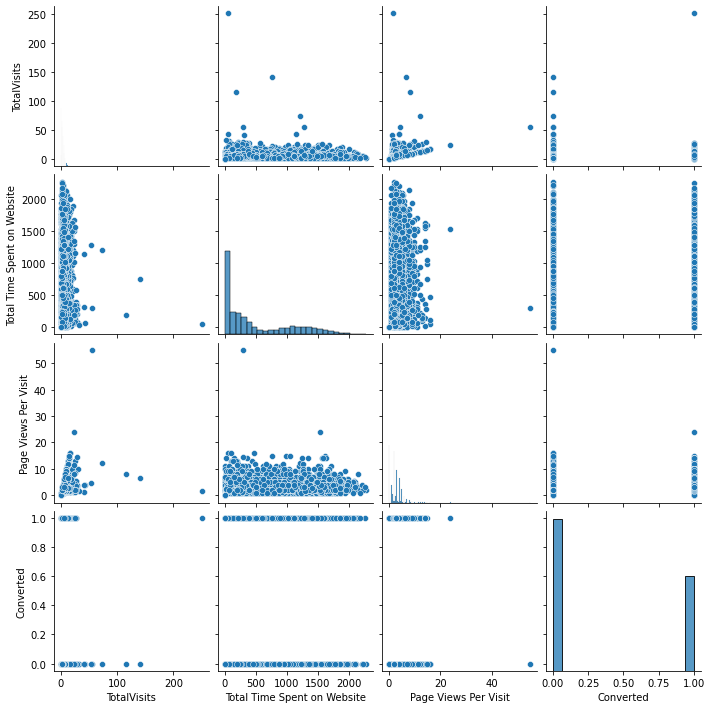

In [258]:
# Pairplot
plt.figure(figsize=(20,30))
sns.pairplot(data=leads_df, vars=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted'])
plt.show()

<AxesSubplot:xlabel='Converted', ylabel='Lead Origin'>

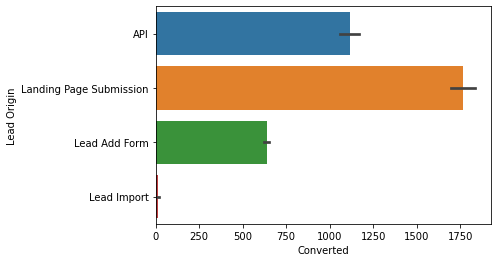

In [259]:
# bar plot
sns.barplot(data=leads_df, x='Converted', y='Lead Origin', estimator=np.sum)

<AxesSubplot:xlabel='Converted', ylabel='Lead Source'>

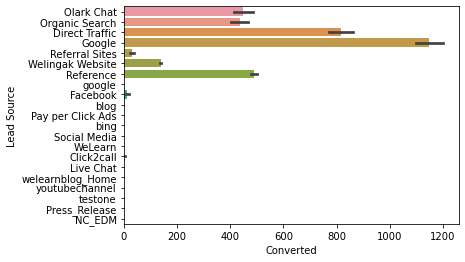

In [260]:
# bar plot
sns.barplot(data=leads_df, x='Converted', y='Lead Source', estimator=np.sum)

<AxesSubplot:xlabel='Converted', ylabel='Do Not Email'>

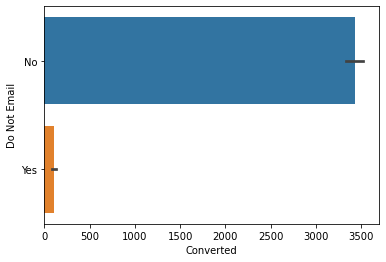

In [261]:
# bar plot
sns.barplot(data=leads_df, x='Converted', y='Do Not Email', estimator=np.sum)

<AxesSubplot:xlabel='Converted', ylabel='Do Not Call'>

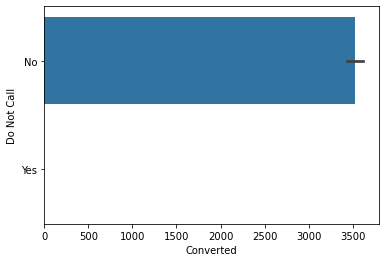

In [262]:
# bar plot
sns.barplot(data=leads_df, x='Converted', y='Do Not Call', estimator=np.sum)

In [263]:
leads_df['Do Not Call'].value_counts()

No     9202
Yes       2
Name: Do Not Call, dtype: int64

In [264]:
# Dropping this column since it have mostly unique values(No) and it's not going to affect the prediction of lead scores decision
leads_df = leads_df.drop('Do Not Call', axis=1)
leads_df.shape

(9204, 26)

<AxesSubplot:xlabel='Converted', ylabel='Last Activity'>

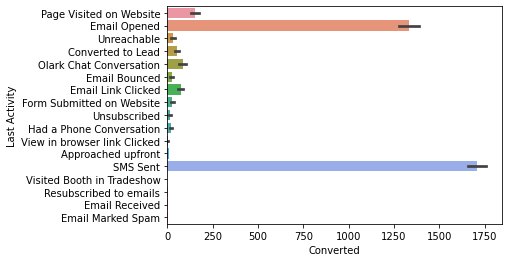

In [265]:
# bar plot
sns.barplot(data=leads_df, x='Converted', y='Last Activity', estimator=np.sum)

<AxesSubplot:xlabel='Converted', ylabel='Country'>

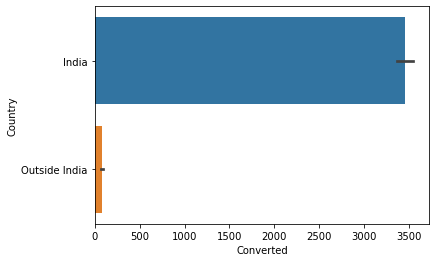

In [266]:
# bar plot
sns.barplot(data=leads_df, x='Converted', y='Country', estimator=np.sum)

<AxesSubplot:xlabel='Converted', ylabel='Specialization'>

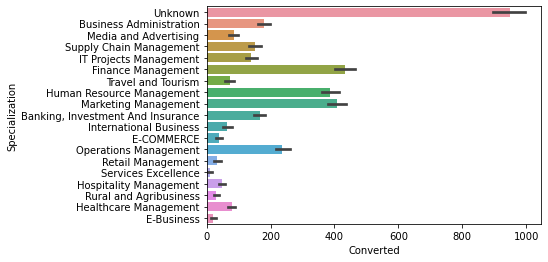

In [267]:
# bar plot
sns.barplot(data=leads_df, x='Converted', y='Specialization', estimator=np.sum)

In [268]:
leads_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Tags', 'Lead Quality', 'Lead Profile',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

<AxesSubplot:xlabel='Converted', ylabel='What is your current occupation'>

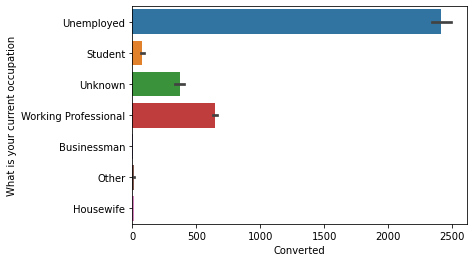

In [269]:
#bar plot
sns.barplot(data=leads_df, x='Converted', y='What is your current occupation', estimator=np.sum)

<AxesSubplot:xlabel='Converted', ylabel='Search'>

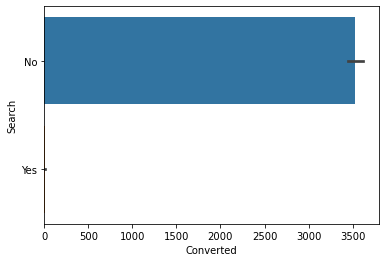

In [270]:
# bar plot
sns.barplot(data=leads_df, x='Converted', y='Search', estimator=np.sum)

In [271]:
leads_df['Search'].value_counts()

No     9190
Yes      14
Name: Search, dtype: int64

<AxesSubplot:xlabel='Converted', ylabel='Newspaper Article'>

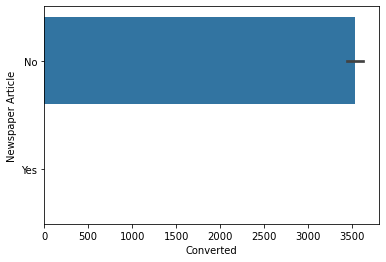

In [272]:
# bar plot
sns.barplot(data=leads_df, x='Converted', y='Newspaper Article', estimator=np.sum)

In [273]:
leads_df['Newspaper Article'].value_counts()

No     9202
Yes       2
Name: Newspaper Article, dtype: int64

In [274]:
# Dropping this column since it have almost unique values(No) and it's not going to affect the prediction of lead scores decision
leads_df = leads_df.drop('Newspaper Article', axis=1)
leads_df.shape

(9204, 25)

In [275]:
leads_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

<AxesSubplot:xlabel='Converted', ylabel='X Education Forums'>

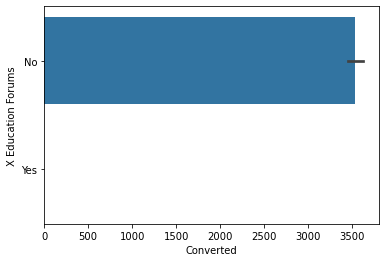

In [276]:
# bar plot
sns.barplot(data=leads_df, x='Converted', y='X Education Forums', estimator=np.sum)

In [277]:
leads_df['X Education Forums'].value_counts()

No     9203
Yes       1
Name: X Education Forums, dtype: int64

In [278]:
# Dropping this column since it have almost unique values(No) and it's not going to affect the prediction of lead scores decision
leads_df = leads_df.drop('X Education Forums', axis=1)
leads_df.shape

(9204, 24)

In [279]:
leads_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

<AxesSubplot:xlabel='Converted', ylabel='Newspaper'>

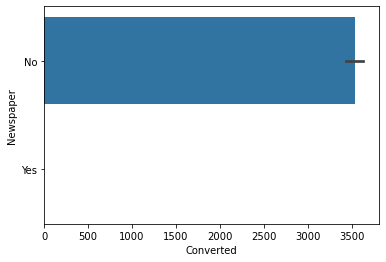

In [280]:
# bar plot
sns.barplot(data=leads_df, x='Converted', y='Newspaper', estimator=np.sum)

In [281]:
leads_df['Newspaper'].value_counts()

No     9203
Yes       1
Name: Newspaper, dtype: int64

In [282]:
# Dropping this column since it have almost unique values(No) and it's not going to affect the prediction of lead scores decision
leads_df = leads_df.drop('Newspaper', axis=1)
leads_df.shape

(9204, 23)

In [283]:
leads_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Digital Advertisement',
       'Through Recommendations', 'Tags', 'Lead Quality', 'Lead Profile',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

<AxesSubplot:xlabel='Converted', ylabel='Digital Advertisement'>

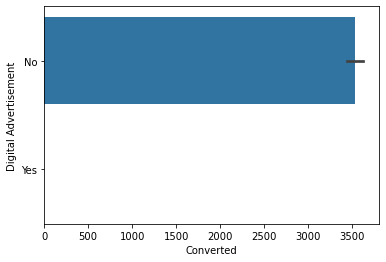

In [284]:
# bar plot
sns.barplot(data=leads_df, x='Converted', y='Digital Advertisement', estimator=np.sum)

In [285]:
leads_df['Through Recommendations'].value_counts()

No     9197
Yes       7
Name: Through Recommendations, dtype: int64

<AxesSubplot:xlabel='Converted', ylabel='Through Recommendations'>

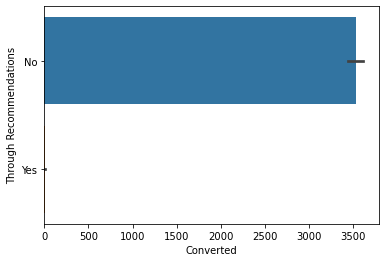

In [286]:
# bar plot
sns.barplot(data=leads_df, x='Converted', y='Through Recommendations', estimator=np.sum)

<AxesSubplot:xlabel='Converted', ylabel='Tags'>

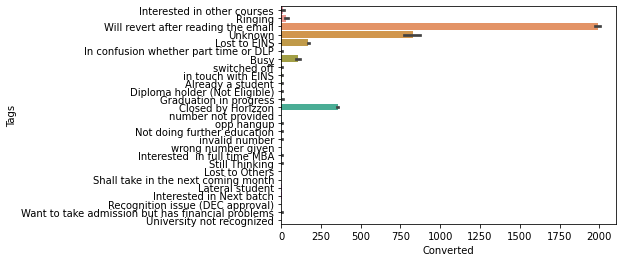

In [287]:
# bar plot
sns.barplot(data=leads_df, x='Converted', y='Tags', estimator=np.sum)

<AxesSubplot:xlabel='Converted', ylabel='Lead Quality'>

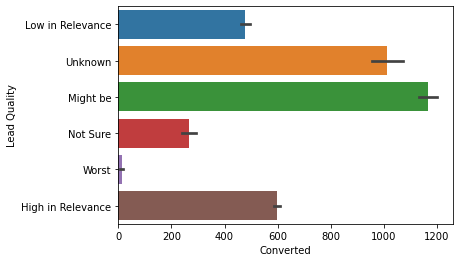

In [288]:
# bar plot
sns.barplot(data=leads_df, x='Converted', y='Lead Quality', estimator=np.sum)

<AxesSubplot:xlabel='Converted', ylabel='Lead Profile'>

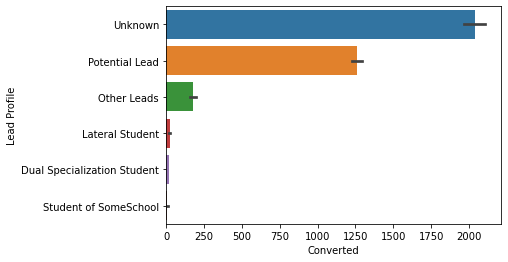

In [289]:
# bar plot
sns.barplot(data=leads_df, x='Converted', y='Lead Profile', estimator=np.sum)

In [290]:
leads_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Digital Advertisement',
       'Through Recommendations', 'Tags', 'Lead Quality', 'Lead Profile',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

<AxesSubplot:xlabel='Converted', ylabel='City'>

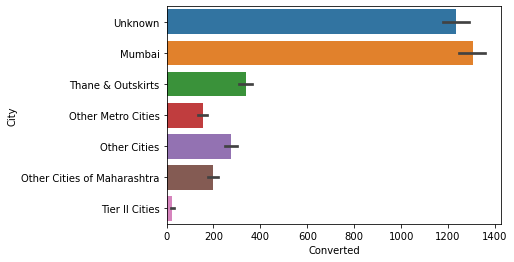

In [291]:
# bar plot
sns.barplot(data=leads_df, x='Converted', y='City', estimator=np.sum)

<AxesSubplot:xlabel='Converted', ylabel='Asymmetrique Activity Index'>

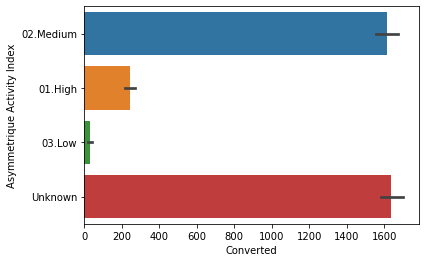

In [292]:
# bar plot
sns.barplot(data=leads_df, x='Converted', y='Asymmetrique Activity Index', estimator=np.sum)

<AxesSubplot:xlabel='Converted', ylabel='Asymmetrique Profile Index'>

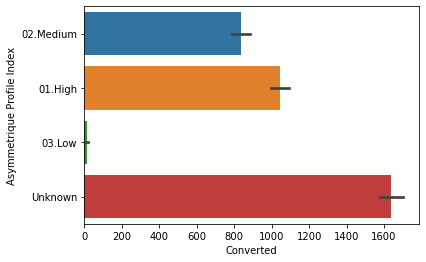

In [293]:
# bar plot
sns.barplot(data=leads_df, x='Converted', y='Asymmetrique Profile Index', estimator=np.sum)

<AxesSubplot:xlabel='Converted', ylabel='A free copy of Mastering The Interview'>

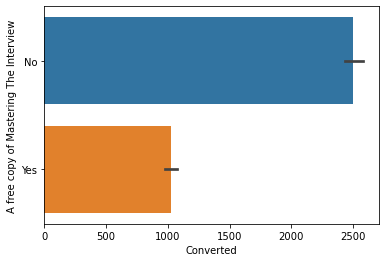

In [294]:
# bar plot
sns.barplot(data=leads_df, x='Converted', y='A free copy of Mastering The Interview', estimator=np.sum)

<AxesSubplot:xlabel='Converted', ylabel='Last Notable Activity'>

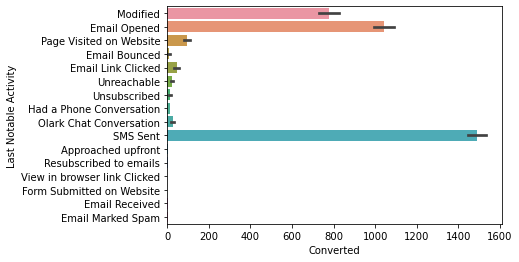

In [295]:
# bar plot
sns.barplot(data=leads_df, x='Converted', y='Last Notable Activity', estimator=np.sum)

<AxesSubplot:>

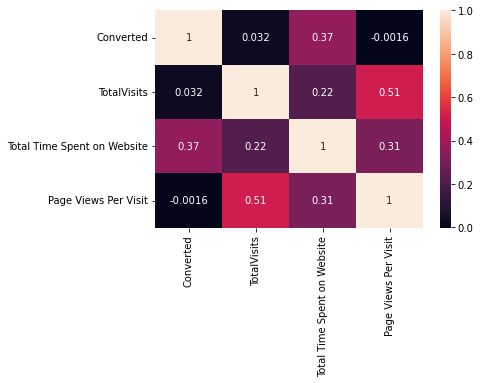

In [296]:
# heatmap
sns.heatmap(leads_df[['Converted','TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr(), annot=True)

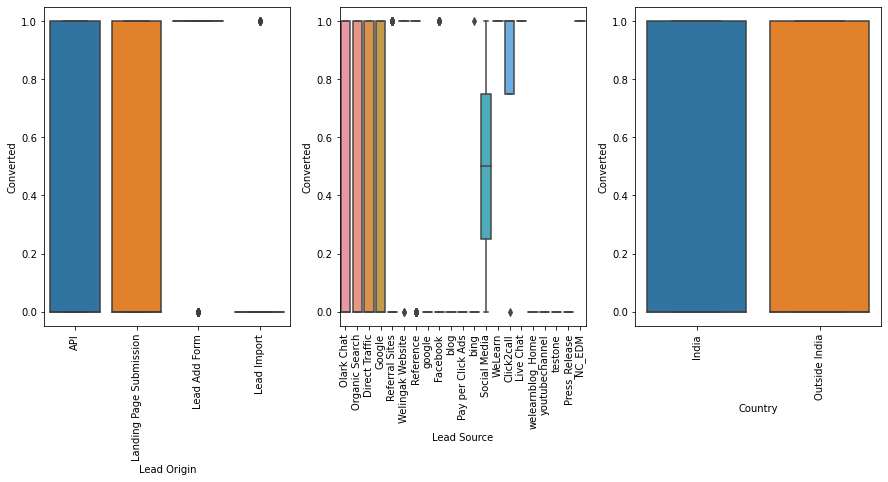

In [297]:
# Box plot for analysing categorical variables to see demands

vars = ['Lead Origin','Lead Source','Country']
plt.figure(figsize=(15, 20))
for val in enumerate(vars):
    plt.subplot(3,3,val[0]+1)
    plt.xticks(x=val[1], rotation='vertical')
    sns.boxplot(data=leads_df, x=val[1], y='Converted')
plt.show()   

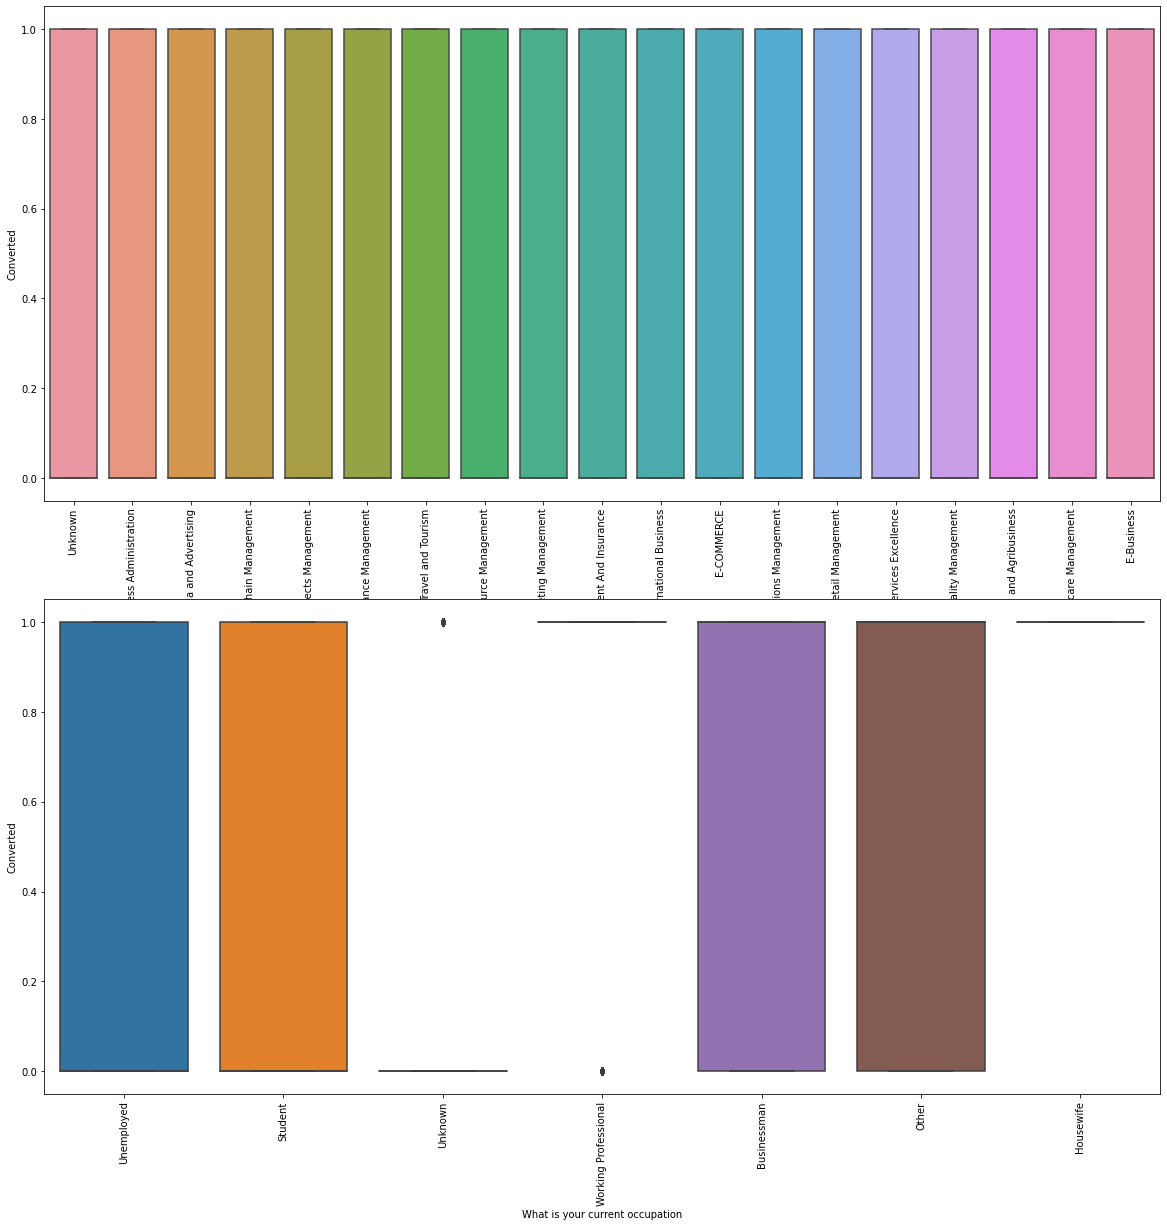

In [298]:
# Box plot for analysing categorical variables to see demands

vars = ['Specialization','What is your current occupation']
plt.figure(figsize=(20, 20))
for val in enumerate(vars):
    plt.subplot(2,1,val[0]+1)
    plt.xticks(x=val[1], rotation='vertical')
    sns.boxplot(data=leads_df, x=val[1], y='Converted')
plt.show()   

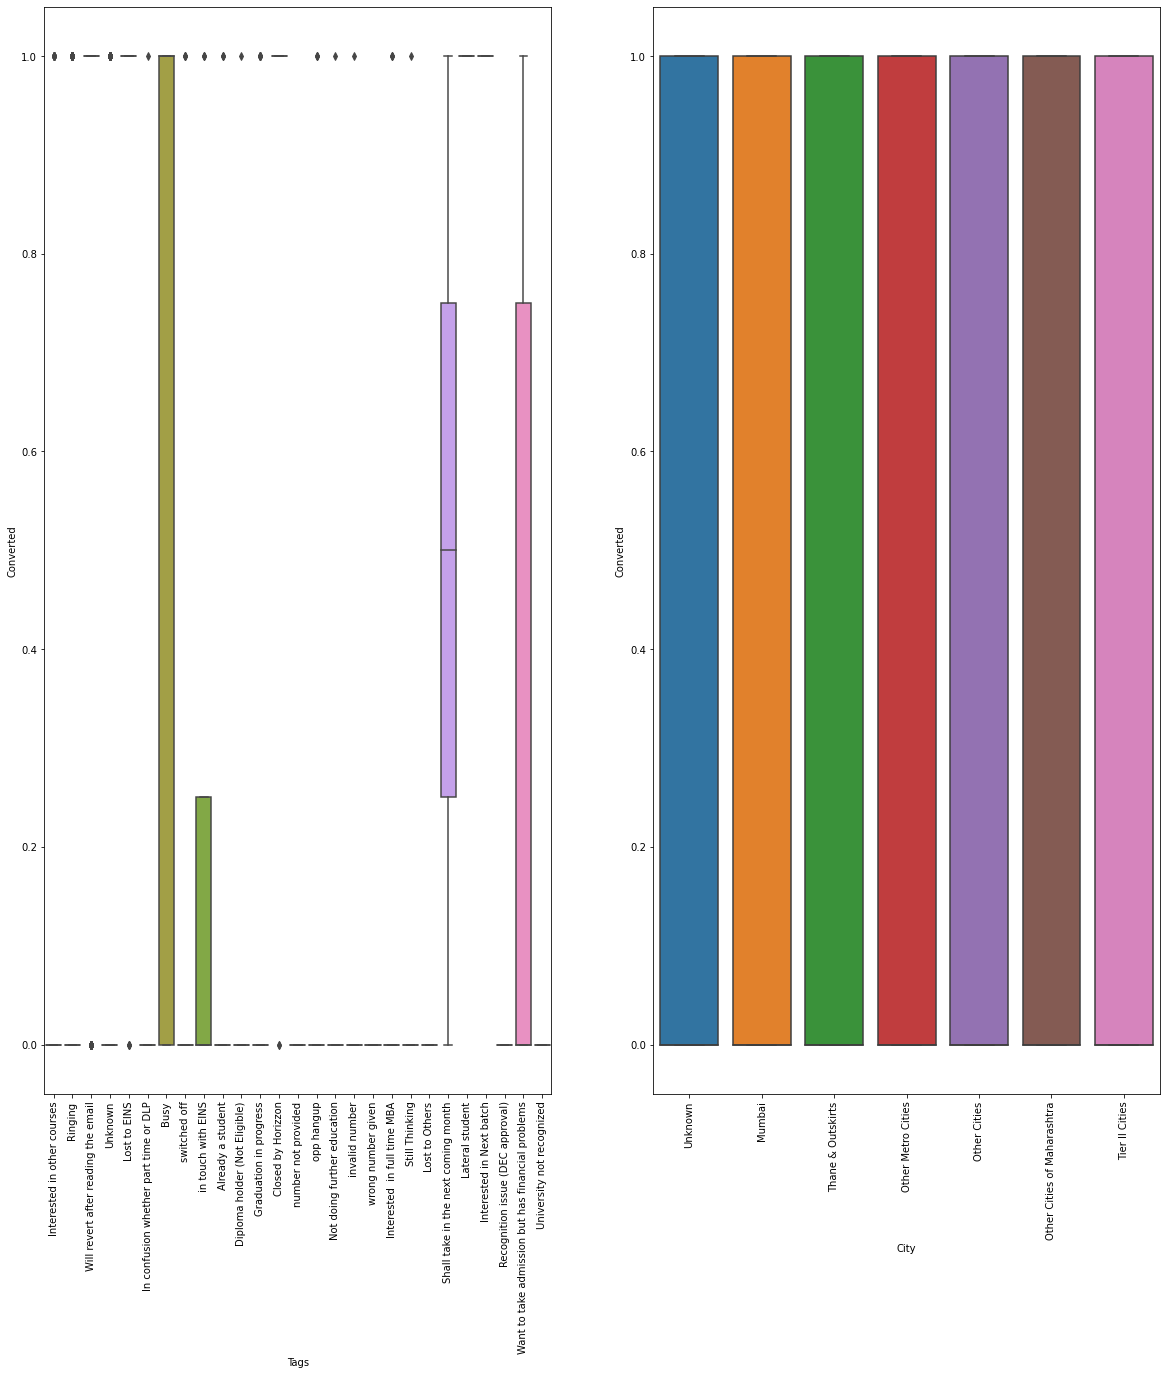

In [299]:
# Box plot for analysing categorical variables to see demands

vars = ['Tags','City']
plt.figure(figsize=(20, 20))
for val in enumerate(vars):
    plt.subplot(1,2,val[0]+1)
    plt.xticks(x=val[1], rotation='vertical')
    sns.boxplot(data=leads_df, x=val[1], y='Converted')
plt.show()   

In [300]:
leads_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Digital Advertisement',
       'Through Recommendations', 'Tags', 'Lead Quality', 'Lead Profile',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [301]:
## Reinspecting null values
# Finding out columns with missing values fraction in the data set (null values fraction in each column)
temp = leads_df.isnull().mean().reset_index()
temp = temp.rename(columns={"index":"Column Name", 0:"Missing value fraction"})
temp = temp.sort_values(by="Missing value fraction", ascending=False)
temp.head(50)

,Column Name,Missing value fraction
0,Lead Number,0.0
12,Search,0.0
21,A free copy of Mastering The Interview,0.0
20,Asymmetrique Profile Index,0.0
19,Asymmetrique Activity Index,0.0
18,City,0.0
17,Lead Profile,0.0
16,Lead Quality,0.0
15,Tags,0.0
14,Through Recommendations,0.0


<AxesSubplot:ylabel='TotalVisits'>

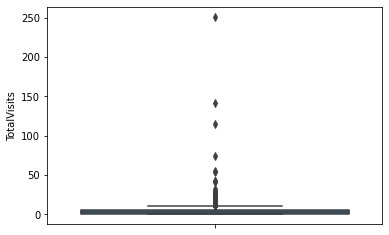

In [302]:
# box plot for checking outliers
sns.boxplot(y=leads_df['TotalVisits'])

<AxesSubplot:ylabel='Total Time Spent on Website'>

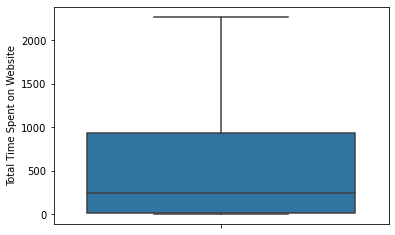

In [303]:
# box plot for checking outliers
sns.boxplot(y=leads_df['Total Time Spent on Website'])

<AxesSubplot:ylabel='Page Views Per Visit'>

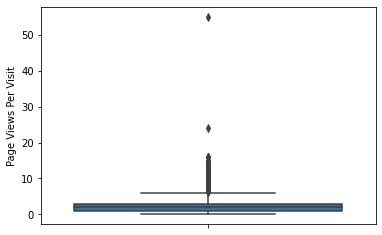

In [304]:
# box plot for checking outliers
sns.boxplot(y=leads_df['Page Views Per Visit'])

In [305]:
# Replacing outliers values with IQR values
Q1 = leads_df['TotalVisits'].quantile(0.25)
Q3 = leads_df['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads_df=leads_df.loc[(leads_df['TotalVisits'] >= Q1 - 1.5*IQR) & (leads_df['TotalVisits'] <= Q3 + 1.5*IQR)]

Q1 = leads_df['Page Views Per Visit'].quantile(0.25)
Q3 = leads_df['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads_df=leads_df.loc[(leads_df['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads_df['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

leads_df.shape

(8643, 23)

<AxesSubplot:ylabel='TotalVisits'>

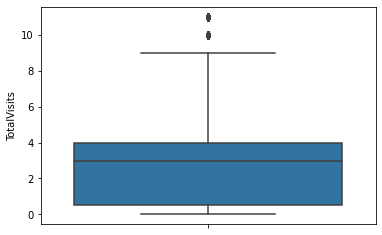

In [306]:
sns.boxplot(y=leads_df['TotalVisits'])

<AxesSubplot:ylabel='Page Views Per Visit'>

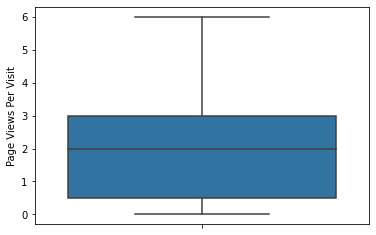

In [307]:
sns.boxplot(y=leads_df['Page Views Per Visit'])

In [308]:
## Convert Yes/No categorical variables to 0/1

In [309]:
# List of variable to map
varlist = ['Do Not Email','Search','Digital Advertisement',
           'Through Recommendations', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})
    
# Applying the function to the var list
leads_df[varlist] = leads_df[varlist].apply(binary_map)

## Step5: Data Preparation for Logistic Regression

# For categorical variables with multiple levels, create dummy features

In [310]:
leads_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Digital Advertisement',
       'Through Recommendations', 'Tags', 'Lead Quality', 'Lead Profile',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [311]:
leads_df['Last Activity'].value_counts()

Email Opened                    3314
SMS Sent                        2565
Olark Chat Conversation          949
Page Visited on Website          525
Converted to Lead                425
Email Bounced                    311
Email Link Clicked               255
Form Submitted on Website        110
Unreachable                       87
Unsubscribed                      57
Had a Phone Conversation          26
Approached upfront                 9
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [312]:
# Check for null values count
leads_df['Last Activity'].isnull().sum()

0

In [313]:
# Creating a dummy variable for some categorical variables and dropping the first column
dummy1 = pd.get_dummies(leads_df[['Lead Origin','Lead Source','Country','Last Activity','Last Notable Activity']], drop_first=True)

leads_df = pd.concat([leads_df, dummy1], axis=1)
leads_df.shape

(8643, 78)

In [314]:
# Creating dummy variables for the remaining categorical variables and 
# dropping the level called 'Unknown' which represents null/select values.

# Creating dummy variables for the variable 'Lead Quality'
ml = pd.get_dummies(leads_df['Lead Quality'], prefix='Lead Quality')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Lead Quality_Unknown'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ml1], axis=1)

# Creating dummy variables for the variable 'Asymmetrique Profile Index'
ml = pd.get_dummies(leads_df['Asymmetrique Profile Index'], prefix='Asymmetrique Profile Index')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Asymmetrique Profile Index_Unknown'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ml1], axis=1)

# Creating dummy variables for the variable 'Asymmetrique Activity Index'
ml = pd.get_dummies(leads_df['Asymmetrique Activity Index'], prefix='Asymmetrique Activity Index')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Asymmetrique Activity Index_Unknown'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ml1], axis=1)

# Creating dummy variables for the variable 'Tags'
ml = pd.get_dummies(leads_df['Tags'], prefix='Tags')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Tags_Unknown'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ml1], axis=1)

# Creating dummy variables for the variable 'Lead Profile'
ml = pd.get_dummies(leads_df['Lead Profile'], prefix='Lead Profile')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Lead Profile_Unknown'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ml1], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'
ml = pd.get_dummies(leads_df['What is your current occupation'], prefix='What is your current occupation')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['What is your current occupation_Unknown'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ml1], axis=1)

# Creating dummy variables for the variable 'Specialization'
ml = pd.get_dummies(leads_df['Specialization'], prefix='Specialization')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Specialization_Unknown'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ml1], axis=1)

# Creating dummy variables for the variable 'City'
ml = pd.get_dummies(leads_df['City'], prefix='City')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['City_Unknown'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ml1], axis=1)

leads_df.shape

(8643, 150)

In [315]:
# We have created dummies for the below variables, so we can drop them
leads_df = leads_df.drop(['Lead Quality','Asymmetrique Profile Index','Asymmetrique Activity Index','Tags','Lead Profile',
                    'Lead Origin','What is your current occupation', 'Specialization', 'City','Last Activity', 'Country', 
                    'Lead Source','Last Notable Activity'], 1)
leads_df.shape

(8643, 137)

In [316]:
# Ensuring there are no categorical columns left in the dataframe
cols = leads_df.columns
num_cols = leads_df._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

In [317]:
leads_df.columns

Index(['Lead Number', 'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       ...
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'City_Mumbai', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities'],
      dtype='object', length=137)

In [318]:
# Creating a copy of this origial variable in case if needed later on
orig_leads_df = leads_df.copy()
print(orig_leads_df.shape)
print(leads_df.shape)

(8643, 137)
(8643, 137)


## Step6: Test and Train Split

In [322]:
# Putting feature variables to x
X = leads_df.drop(['Converted','Lead Number'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [323]:
# Putting response variable to y
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [324]:
# split train and test data set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print (X_train.shape)
print (X_test.shape)

(6050, 135)
(2593, 135)


In [325]:
# Scale continuous variables
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

scaler = StandardScaler()

# Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [326]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
5720,0,0.497461,1.974846,1.161899,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7026,0,-1.170391,-0.876707,-1.266501,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6968,0,1.331387,1.265159,-0.052301,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
5016,0,-1.170391,-0.876707,-1.266501,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6653,0,-0.336465,0.705457,-0.052301,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [327]:
# Checking the converted rate
converted_rate = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
converted_rate

38.215897257896565

We have around 38% converted rate

## Step7: Build Model

In [328]:
# Logistic Regression Model
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial()) 
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     5921
Model Family:                Binomial   Df Model:                          128
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 15 Oct 2022   Deviance:                       45867.
Time:                        18:38:46   Pearson chi2:                 2.24e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   9.981e+15   8.34e+07    1.2e+08      0.000    9.98e+15    9.98e+15
Do Not Email                                           -2.232e+14   4.87e+06  -4.59e+07      0.000   -2.23e+14   -2.23e+14
TotalVisits                                             2.312e+13   1.46e+06   1.58e+07      0.000    2.31e+13    2.31e+13
Total Time Spent on Website                               5.7e+13   1.05e+06   5.42e+07      0.000     5.7e+13     5.7e+13
Page Views Per Visit                                   -2.331e+13   1.62e+06  -1.44e+07      0.000   -2.33e+13   -2.33e+13
Search                                                  6.615e+14   3.21e+07   2.06e+07      0.000    6.62e+14    6.62e+14
Digital Advertisement                                   3.171e+15   6.76e+07   4.69e+07      0.000    3.17e+15    3.17e+15
Through Recommendations                                 1.745e+15   5.04e+07   3.46e+07      0.000    1.74e+15    1.74e+15
A free copy of Mastering The Interview                 -1.627e+13   2.92e+06  -5.58e+06      0.000   -1.63e+13   -1.63e+13
Lead Origin_Landing Page Submission                     -8.73e+13   4.22e+06  -2.07e+07      0.000   -8.73e+13   -8.73e+13
Lead Origin_Lead Add Form                              -4.053e+15   6.74e+07  -6.01e+07      0.000   -4.05e+15   -4.05e+15
Lead Origin_Lead Import                                 5.882e+15   6.92e+07    8.5e+07      0.000    5.88e+15    5.88e+15
Lead Source_Direct Traffic                             -7.285e+15   8.26e+07  -8.81e+07      0.000   -7.28e+15   -7.28e+15
Lead Source_Facebook                                   -1.343e+16   1.07e+08  -1.25e+08      0.000   -1.34e+16   -1.34e+16
Lead Source_Google                                     -7.336e+15   8.26e+07  -8.88e+07      0.000   -7.34e+15   -7.34e+15
Lead Source_Live Chat                                  -2.019e+14   6.75e+07  -2.99e+06      0.000   -2.02e+14   -2.02e+14
Lead Source_NC_EDM                                      3.773e+13   1.07e+08   3.54e+05      0.000    3.77e+13    3.77e+13
Lead Source_Olark Chat                                 -7.618e+15   8.25e+07  -9.23e+07      0.000   -7.62e+15   -7.62e+15
Lead Source_Organic Search                             -7.404e+15   8.27e+07  -8.96e+07      0.000    -7.4e+15    -7.4e+15
Lead Source_Pay per Click Ads                          -1.201e+16   1.07e+08  -1.13e+08      0.000    -1.2e+16    -1.2e+16
Lead Source_Press_Release                              -7.898e+15   1.07e+08  -7.38e+07      0.000    -7.9e+15    -7.9e+15
Lead Source_Reference                                  -3.646e+15   4.79e+07  -7.62e+07      0.000   -3.65e+15   -3.65e+15
Lead Sou

## Step8: Feature selection using RFE

In [335]:
# Logistic Regression Model
logreg = LogisticRegression()

In [336]:
rfe = RFE(logreg, 20) # Running RFE with 20 features
rfe = rfe.fit(X_train, y_train)

In [337]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True,  True, False,  True,  True, False, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
       False, False, False,  True, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [338]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 5),
 ('TotalVisits', False, 56),
 ('Total Time Spent on Website', False, 8),
 ('Page Views Per Visit', False, 54),
 ('Search', False, 16),
 ('Digital Advertisement', False, 99),
 ('Through Recommendations', False, 103),
 ('A free copy of Mastering The Interview', False, 28),
 ('Lead Origin_Landing Page Submission', False, 73),
 ('Lead Origin_Lead Add Form', False, 6),
 ('Lead Origin_Lead Import', False, 66),
 ('Lead Source_Direct Traffic', False, 62),
 ('Lead Source_Facebook', False, 36),
 ('Lead Source_Google', False, 63),
 ('Lead Source_Live Chat', False, 105),
 ('Lead Source_NC_EDM', False, 15),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 61),
 ('Lead Source_Pay per Click Ads', False, 106),
 ('Lead Source_Press_Release', False, 112),
 ('Lead Source_Reference', False, 40),
 ('Lead Source_Referral Sites', False, 48),
 ('Lead Source_Social Media', False, 114),
 ('Lead Source_WeLearn', False, 107),
 ('Lead Source_Welingak Websit

In [339]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Lead Quality_Worst', 'Asymmetrique Activity Index_03.Low',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number given', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [340]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       ...
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'City_Mumbai', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities'],
      dtype='object', length=115)

Assessing the model with statsmodels

In [341]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6029
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1230.3
Date:                Sat, 15 Oct 2022   Deviance:                       2460.7
Time:                        18:42:27   Pearson chi2:                 8.66e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6014      0.093    -27.950      0.000      -2.784      -2.419
Lead Source_Welingak Website                             3.8734      1.017      3.809      0.000       1.880       5.866
Last Activity_SMS Sent                                   2.1102      0.116     18.265      0.000       1.884       2.337
Lead Quality_Worst                                      -1.7187      0.555     -3.100      0.002      -2.806      -0.632
Asymmetrique Activity Index_03.Low                      -2.6523      0.353     -7.509      0.000      -3.345      -1.960
Tags_Already a student                                  -3.7527      0.603     -6.224      0.000      -4.934      -2.571
Tags_Closed by Horizzon                                  5.1763      0.725      7.141      0.000       3.756       6.597
Tags_Diploma holder (Not Eligible)                     -23.5459   1.85e+04     -0.001      0.999   -3.63e+04    3.63e+04
Tags_Interested  in full time MBA                       -3.2765      0.741     -4.422      0.000      -4.729      -1.824
Tags_Interested in other courses                        -3.3999      0.360     -9.453      0.000      -4.105      -2.695
Tags_Lost to EINS                                        5.2071      0.576      9.037      0.000       4.078       6.336
Tags_Not doing further education                        -4.1820      1.030     -4.062      0.000      -6.200      -2.164
Tags_Ringing                                            -4.5289      0.255    -17.754      0.000      -5.029      -4.029
Tags_Will revert after reading the email                 3.6188      0.206     17.591      0.000       3.216       4.022
Tags_invalid number                                     -4.5063      1.031     -4.371      0.000      -6.527      -2.486
Tags_number not provided                               -25.2584   2.79e+04     -0.001      0.999   -5.47e+04    5.46e+04
Tags_opp hangup                                         -2.8735      0.788     -3.647      0.000      -4.418      -1.329
Tags_switched off                                       -5.2704      0.726     -7.263      0.000      -6.693      -3.848
Tags_wrong number given                                -25.2157   2.48e+04     -0.001      0.999   -4.87e+04    4.87e+04
What is your current occupation_Unemployed               2.3063      0.120     19.144      0.000       2.070       2.542
What is your current occupation_Working Professional     2.4626      0.382      6.446      0.000       1.714       3.211
========================================================================================================================
"""

In [342]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5720    0.992469
7026    0.069049
6968    0.965231
5016    0.379611
6653    0.859974
7157    0.024245
2521    0.965231
920     0.069049
4731    0.965231
134     0.972835
dtype: float64

In [343]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99246893, 0.06904908, 0.9652313 , 0.37961118, 0.85997392,
       0.02424544, 0.9652313 , 0.06904908, 0.9652313 , 0.97283495])

Creating a dataframe with the actual converted flag and the predicted probabilities

In [344]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.992469,5720
1,0,0.069049,7026
2,1,0.965231,6968
3,1,0.379611,5016
4,1,0.859974,6653


Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [345]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,1,0.992469,5720,1
1,0,0.069049,7026,0
2,1,0.965231,6968,1
3,1,0.379611,5016,0
4,1,0.859974,6653,1


In [346]:
from sklearn import metrics

## Confusion Matrix

In [347]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3679   77]
 [ 409 1885]]


In [348]:
# Predicted       not_converted    converted
# Actual
# not_converted          3604        152
# converted              269        2050 

In [349]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9196694214876033


## Checking VIFs

In [350]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Tags_Closed by Horizzon,1.31
10,Tags_Not doing further education,1.26
16,Tags_switched off,1.18
7,Tags_Interested in full time MBA,1.13
6,Tags_Diploma holder (Not Eligible),1.09
13,Tags_invalid number,1.08
0,Lead Source_Welingak Website,1.08
3,Asymmetrique Activity Index_03.Low,1.08
9,Tags_Lost to EINS,1.07
15,Tags_opp hangup,1.03


Clearly there is not much multicollinearity present in our model among the selected features as per their VIF values.

## Correlation

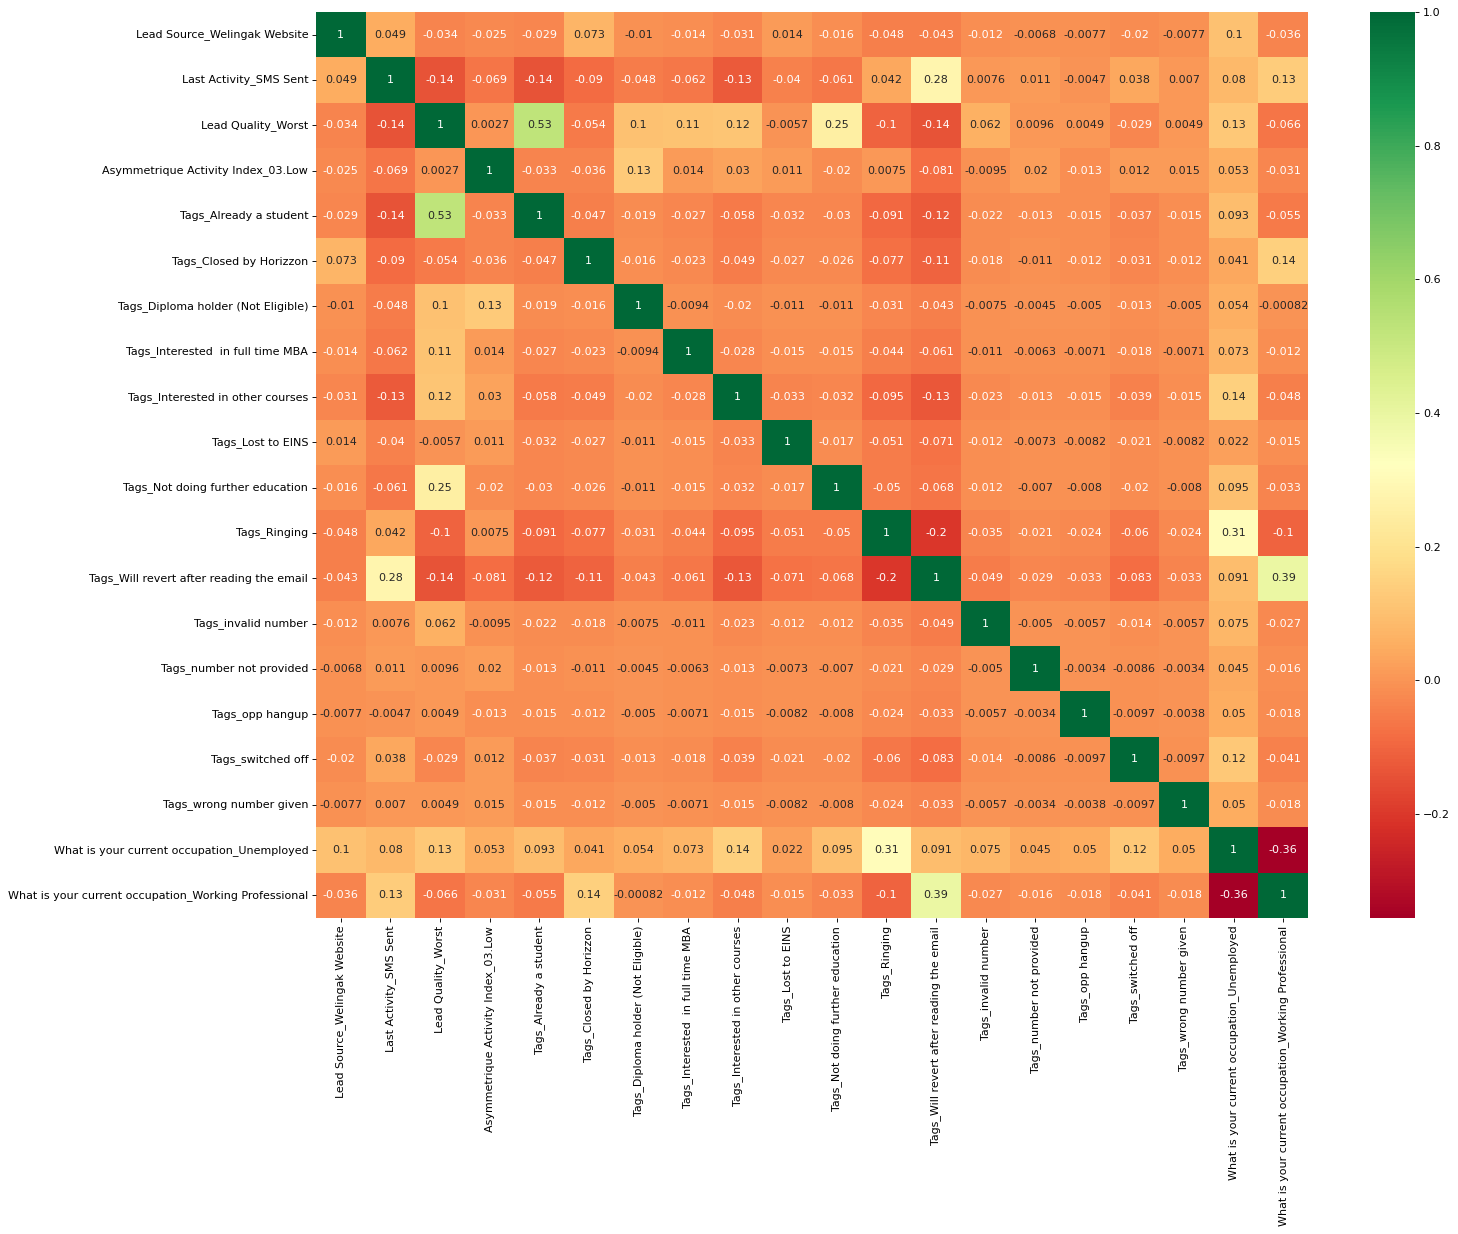

In [351]:
plt.figure(figsize=(20,15), dpi=80)

sns.heatmap(X_train[col].corr(), annot=True, cmap="RdYlGn")

plt.show()

In [352]:
# Droping the variable having high VIF and having high p-values.(Tags_number not provided)
col = col.drop('Tags_number not provided', 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Lead Quality_Worst', 'Asymmetrique Activity Index_03.Low',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_opp hangup', 'Tags_switched off', 'Tags_wrong number given',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [353]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6030
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1247.1
Date:                Sat, 15 Oct 2022   Deviance:                       2494.2
Time:                        18:43:36   Pearson chi2:                 8.47e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5859      0.092    -28.028      0.000      -2.767      -2.405
Lead Source_Welingak Website                             3.9447      1.017      3.880      0.000       1.952       5.937
Last Activity_SMS Sent                                   2.0714      0.114     18.170      0.000       1.848       2.295
Lead Quality_Worst                                      -1.8673      0.555     -3.366      0.001      -2.955      -0.780
Asymmetrique Activity Index_03.Low                      -2.6093      0.353     -7.396      0.000      -3.301      -1.918
Tags_Already a student                                  -3.6533      0.601     -6.079      0.000      -4.831      -2.475
Tags_Closed by Horizzon                                  5.2159      0.724      7.202      0.000       3.797       6.635
Tags_Diploma holder (Not Eligible)                     -23.4529   1.85e+04     -0.001      0.999   -3.63e+04    3.62e+04
Tags_Interested  in full time MBA                       -3.1916      0.740     -4.313      0.000      -4.642      -1.741
Tags_Interested in other courses                        -3.3173      0.359     -9.246      0.000      -4.020      -2.614
Tags_Lost to EINS                                        5.2431      0.579      9.048      0.000       4.107       6.379
Tags_Not doing further education                        -4.0764      1.029     -3.963      0.000      -6.093      -2.060
Tags_Ringing                                            -4.4320      0.254    -17.473      0.000      -4.929      -3.935
Tags_Will revert after reading the email                 3.6613      0.205     17.890      0.000       3.260       4.062
Tags_invalid number                                     -4.3988      1.030     -4.269      0.000      -6.418      -2.379
Tags_opp hangup                                         -2.7779      0.787     -3.532      0.000      -4.320      -1.236
Tags_switched off                                       -5.1706      0.725     -7.131      0.000      -6.592      -3.750
Tags_wrong number given                                -25.1161   2.49e+04     -0.001      0.999   -4.88e+04    4.87e+04
What is your current occupation_Unemployed               2.2244      0.119     18.741      0.000       1.992       2.457
What is your current occupation_Working Professional     2.4126      0.381      6.327      0.000       1.665       3.160
========================================================================================================================
"""

In [354]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5720    0.992266
7026    0.070048
6968    0.964421
5016    0.374135
6653    0.846817
7157    0.024630
2521    0.964421
920     0.070048
4731    0.964421
134     0.972961
dtype: float64

In [355]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.9922659 , 0.07004842, 0.96442077, 0.37413477, 0.84681663,
       0.02463011, 0.96442077, 0.07004842, 0.96442077, 0.97296125])

Creating a dataframe with the actual converted flag and the predicted probabilities

In [356]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.992266,5720
1,0,0.070048,7026
2,1,0.964421,6968
3,1,0.374135,5016
4,1,0.846817,6653


Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [357]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,1,0.992266,5720,1
1,0,0.070048,7026,0
2,1,0.964421,6968,1
3,1,0.374135,5016,0
4,1,0.846817,6653,1


In [358]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3673   83]
 [ 408 1886]]


In [359]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9188429752066116


## Checking VIFs

In [360]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Tags_Closed by Horizzon,1.31
10,Tags_Not doing further education,1.25
15,Tags_switched off,1.17
7,Tags_Interested in full time MBA,1.13
6,Tags_Diploma holder (Not Eligible),1.09
0,Lead Source_Welingak Website,1.08
3,Asymmetrique Activity Index_03.Low,1.08
13,Tags_invalid number,1.07
9,Tags_Lost to EINS,1.07
14,Tags_opp hangup,1.03


As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [361]:
# Dropping variable Tags_wrong number given
col = col.drop('Tags_wrong number given', 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Lead Quality_Worst', 'Asymmetrique Activity Index_03.Low',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_opp hangup', 'Tags_switched off',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [362]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6031
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1266.8
Date:                Sat, 15 Oct 2022   Deviance:                       2533.5
Time:                        18:44:31   Pearson chi2:                 8.30e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5726      0.092    -28.114      0.000      -2.752      -2.393
Lead Source_Welingak Website                             4.0311      1.016      3.966      0.000       2.039       6.023
Last Activity_SMS Sent                                   2.0359      0.112     18.113      0.000       1.816       2.256
Lead Quality_Worst                                      -1.9784      0.552     -3.587      0.000      -3.060      -0.897
Asymmetrique Activity Index_03.Low                      -2.5585      0.353     -7.252      0.000      -3.250      -1.867
Tags_Already a student                                  -3.5483      0.599     -5.919      0.000      -4.723      -2.373
Tags_Closed by Horizzon                                  5.2679      0.723      7.282      0.000       3.850       6.686
Tags_Diploma holder (Not Eligible)                     -23.3526   1.85e+04     -0.001      0.999   -3.63e+04    3.62e+04
Tags_Interested  in full time MBA                       -3.0966      0.739     -4.189      0.000      -4.545      -1.648
Tags_Interested in other courses                        -3.2228      0.358     -9.005      0.000      -3.924      -2.521
Tags_Lost to EINS                                        5.2772      0.582      9.074      0.000       4.137       6.417
Tags_Not doing further education                        -3.9643      1.028     -3.857      0.000      -5.979      -1.950
Tags_Ringing                                            -4.3225      0.252    -17.144      0.000      -4.817      -3.828
Tags_Will revert after reading the email                 3.7154      0.203     18.259      0.000       3.317       4.114
Tags_invalid number                                     -4.2826      1.030     -4.158      0.000      -6.301      -2.264
Tags_opp hangup                                         -2.6709      0.785     -3.402      0.001      -4.210      -1.132
Tags_switched off                                       -5.0585      0.724     -6.983      0.000      -6.478      -3.639
What is your current occupation_Unemployed               2.1291      0.117     18.237      0.000       1.900       2.358
What is your current occupation_Working Professional     2.3543      0.381      6.184      0.000       1.608       3.100
========================================================================================================================
"""

In [363]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5720    0.992032
7026    0.070920
6968    0.963450
5016    0.368938
6653    0.830937
7157    0.024932
2521    0.963450
920     0.070920
4731    0.963450
134     0.973079
dtype: float64

In [364]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99203213, 0.07091997, 0.9634499 , 0.36893814, 0.8309374 ,
       0.02493186, 0.9634499 , 0.07091997, 0.9634499 , 0.97307867])

In [365]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.992032,5720
1,0,0.070920,7026
2,1,0.963450,6968
3,1,0.368938,5016
4,1,0.830937,6653


In [366]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,1,0.992032,5720,1
1,0,0.070920,7026,0
2,1,0.963450,6968,1
3,1,0.368938,5016,0
4,1,0.830937,6653,1


In [367]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3666   90]
 [ 408 1886]]


In [368]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9176859504132231


In [369]:
# Checking VIFS
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Tags_Closed by Horizzon,1.30
10,Tags_Not doing further education,1.25
15,Tags_switched off,1.17
7,Tags_Interested in full time MBA,1.12
6,Tags_Diploma holder (Not Eligible),1.09
0,Lead Source_Welingak Website,1.08
3,Asymmetrique Activity Index_03.Low,1.08
13,Tags_invalid number,1.07
9,Tags_Lost to EINS,1.06
14,Tags_opp hangup,1.03


In [370]:
# Dropping Tags_Not doing further educationlumn due to high -pvalue and high vif.
col = col.drop('Tags_Not doing further education', 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Lead Quality_Worst', 'Asymmetrique Activity Index_03.Low',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_opp hangup', 'Tags_switched off',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [371]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6032
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1291.6
Date:                Sat, 15 Oct 2022   Deviance:                       2583.1
Time:                        18:44:37   Pearson chi2:                 8.66e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5912      0.092    -28.275      0.000      -2.771      -2.412
Lead Source_Welingak Website                             4.1796      1.016      4.113      0.000       2.188       6.171
Last Activity_SMS Sent                                   2.0619      0.111     18.571      0.000       1.844       2.280
Lead Quality_Worst                                      -2.7670      0.497     -5.563      0.000      -3.742      -1.792
Asymmetrique Activity Index_03.Low                      -2.4660      0.356     -6.934      0.000      -3.163      -1.769
Tags_Already a student                                  -3.3116      0.596     -5.553      0.000      -4.480      -2.143
Tags_Closed by Horizzon                                  5.3899      0.722      7.461      0.000       3.974       6.806
Tags_Diploma holder (Not Eligible)                     -23.1466   1.83e+04     -0.001      0.999   -3.58e+04    3.58e+04
Tags_Interested  in full time MBA                       -2.9173      0.740     -3.941      0.000      -4.368      -1.466
Tags_Interested in other courses                        -3.0629      0.357     -8.568      0.000      -3.763      -2.362
Tags_Lost to EINS                                        5.5545      0.608      9.135      0.000       4.363       6.746
Tags_Ringing                                            -4.1907      0.251    -16.706      0.000      -4.682      -3.699
Tags_Will revert after reading the email                 3.8292      0.202     18.955      0.000       3.433       4.225
Tags_invalid number                                     -4.1127      1.031     -3.989      0.000      -6.133      -2.092
Tags_opp hangup                                         -2.5172      0.787     -3.197      0.001      -4.061      -0.974
Tags_switched off                                       -4.9256      0.724     -6.802      0.000      -6.345      -3.506
What is your current occupation_Unemployed               1.9951      0.115     17.412      0.000       1.771       2.220
What is your current occupation_Working Professional     2.2158      0.372      5.953      0.000       1.486       2.945
========================================================================================================================
"""

In [372]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5720    0.991787
7026    0.069705
6968    0.962061
5016    0.370672
6653    0.812412
7157    0.025111
2521    0.962061
920     0.069705
4731    0.962061
134     0.972970
dtype: float64

In [373]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99178674, 0.06970458, 0.96206126, 0.37067242, 0.81241184,
       0.0251114 , 0.96206126, 0.06970458, 0.96206126, 0.97297017])

In [374]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.991787,5720
1,0,0.069705,7026
2,1,0.962061,6968
3,1,0.370672,5016
4,1,0.812412,6653


In [375]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,1,0.991787,5720,1
1,0,0.069705,7026,0
2,1,0.962061,6968,1
3,1,0.370672,5016,0
4,1,0.812412,6653,1


In [376]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3661   95]
 [ 409 1885]]


In [377]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9166942148760331


In [378]:
# Checking VIFs
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Tags_Closed by Horizzon,1.28
14,Tags_switched off,1.15
7,Tags_Interested in full time MBA,1.10
0,Lead Source_Welingak Website,1.08
3,Asymmetrique Activity Index_03.Low,1.07
6,Tags_Diploma holder (Not Eligible),1.07
9,Tags_Lost to EINS,1.06
12,Tags_invalid number,1.06
13,Tags_opp hangup,1.03
16,What is your current occupation_Working Profes...,0.83


In [379]:
# Dropping Tags_invalid number due to high vif and high p-value.
col = col.drop('Tags_invalid number', 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Lead Quality_Worst', 'Asymmetrique Activity Index_03.Low',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_opp hangup',
       'Tags_switched off', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [380]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6033
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1317.0
Date:                Sat, 15 Oct 2022   Deviance:                       2633.9
Time:                        18:44:45   Pearson chi2:                 8.37e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5794      0.091    -28.387      0.000      -2.758      -2.401
Lead Source_Welingak Website                             4.3020      1.016      4.235      0.000       2.311       6.293
Last Activity_SMS Sent                                   2.0269      0.109     18.590      0.000       1.813       2.241
Lead Quality_Worst                                      -2.9650      0.489     -6.061      0.000      -3.924      -2.006
Asymmetrique Activity Index_03.Low                      -2.3916      0.358     -6.686      0.000      -3.093      -1.691
Tags_Already a student                                  -3.1751      0.596     -5.330      0.000      -4.343      -2.008
Tags_Closed by Horizzon                                  5.4712      0.722      7.581      0.000       4.057       6.886
Tags_Diploma holder (Not Eligible)                     -23.0109   1.82e+04     -0.001      0.999   -3.58e+04    3.57e+04
Tags_Interested  in full time MBA                       -2.7900      0.739     -3.773      0.000      -4.239      -1.341
Tags_Interested in other courses                        -2.9350      0.357     -8.232      0.000      -3.634      -2.236
Tags_Lost to EINS                                        5.6436      0.616      9.157      0.000       4.436       6.852
Tags_Ringing                                            -4.0458      0.249    -16.241      0.000      -4.534      -3.558
Tags_Will revert after reading the email                 3.9105      0.201     19.497      0.000       3.517       4.304
Tags_opp hangup                                         -2.3756      0.786     -3.023      0.003      -3.916      -0.835
Tags_switched off                                       -4.7782      0.723     -6.605      0.000      -6.196      -3.360
What is your current occupation_Unemployed               1.8652      0.112     16.616      0.000       1.645       2.085
What is your current occupation_Working Professional     2.1362      0.372      5.740      0.000       1.407       2.866
========================================================================================================================
"""

In [381]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5720    0.991481
7026    0.070473
6968    0.960695
5016    0.365272
6653    0.787952
7157    0.025351
2521    0.960695
920     0.070473
4731    0.960695
134     0.973085
dtype: float64

In [382]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99148114, 0.07047348, 0.96069457, 0.36527161, 0.78795243,
       0.02535099, 0.96069457, 0.07047348, 0.96069457, 0.97308453])

In [383]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.991481,5720
1,0,0.070473,7026
2,1,0.960695,6968
3,1,0.365272,5016
4,1,0.787952,6653


In [384]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,1,0.991481,5720,1
1,0,0.070473,7026,0
2,1,0.960695,6968,1
3,1,0.365272,5016,0
4,1,0.787952,6653,1


In [385]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3650  106]
 [ 409 1885]]


In [386]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9148760330578513


In [387]:
# Checking VIFs
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Tags_Closed by Horizzon,1.27
13,Tags_switched off,1.15
7,Tags_Interested in full time MBA,1.09
0,Lead Source_Welingak Website,1.07
3,Asymmetrique Activity Index_03.Low,1.07
6,Tags_Diploma holder (Not Eligible),1.07
9,Tags_Lost to EINS,1.05
12,Tags_opp hangup,1.02
15,What is your current occupation_Working Profes...,0.82
2,Lead Quality_Worst,0.60


## Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

In [389]:
col = col.drop('Tags_Diploma holder (Not Eligible)', 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Lead Quality_Worst', 'Asymmetrique Activity Index_03.Low',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_opp hangup',
       'Tags_switched off', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [390]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6050
Model:                            GLM   Df Residuals:                     6034
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1324.4
Date:                Sat, 15 Oct 2022   Deviance:                       2648.7
Time:                        18:50:48   Pearson chi2:                 8.48e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5877      0.091    -28.428      0.000      -2.766      -2.409
Lead Source_Welingak Website                             4.3426      1.016      4.275      0.000       2.352       6.334
Last Activity_SMS Sent                                   2.0418      0.109     18.773      0.000       1.829       2.255
Lead Quality_Worst                                      -3.0057      0.486     -6.189      0.000      -3.958      -2.054
Asymmetrique Activity Index_03.Low                      -2.4273      0.354     -6.863      0.000      -3.121      -1.734
Tags_Already a student                                  -3.1327      0.596     -5.258      0.000      -4.300      -1.965
Tags_Closed by Horizzon                                  5.5079      0.722      7.634      0.000       4.094       6.922
Tags_Interested  in full time MBA                       -2.7505      0.740     -3.719      0.000      -4.200      -1.301
Tags_Interested in other courses                        -2.8971      0.357     -8.126      0.000      -3.596      -2.198
Tags_Lost to EINS                                        5.6883      0.619      9.193      0.000       4.476       6.901
Tags_Ringing                                            -4.0147      0.249    -16.128      0.000      -4.503      -3.527
Tags_Will revert after reading the email                 3.9458      0.200     19.696      0.000       3.553       4.338
Tags_opp hangup                                         -2.3413      0.787     -2.977      0.003      -3.883      -0.800
Tags_switched off                                       -4.7478      0.723     -6.564      0.000      -6.166      -3.330
What is your current occupation_Unemployed               1.8307      0.112     16.367      0.000       1.611       2.050
What is your current occupation_Working Professional     2.1078      0.371      5.686      0.000       1.381       2.834
========================================================================================================================
"""

In [391]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5720    0.991431
7026    0.069936
6968    0.960411
5016    0.366825
6653    0.783272
7157    0.025231
2521    0.960411
920     0.069936
4731    0.960411
134     0.973027
dtype: float64

In [392]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99143059, 0.06993567, 0.96041132, 0.3668249 , 0.78327188,
       0.02523112, 0.96041132, 0.06993567, 0.96041132, 0.97302697])

Creating a dataframe with the actual converted flag and the predicted probabilities

In [393]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,1,0.991431,5720
1,0,0.069936,7026
2,1,0.960411,6968
3,1,0.366825,5016
4,1,0.783272,6653


Creating new column 'predicted' with 1 if Converted > 0.5 else 0

In [394]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,1,0.991431,5720,1
1,0,0.069936,7026,0
2,1,0.960411,6968,1
3,1,0.366825,5016,0
4,1,0.783272,6653,1


In [395]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3649  107]
 [ 409 1885]]


In [396]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9147107438016528


# Checking VIFs

In [397]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Tags_Closed by Horizzon,1.26
12,Tags_switched off,1.14
6,Tags_Interested in full time MBA,1.09
0,Lead Source_Welingak Website,1.07
3,Asymmetrique Activity Index_03.Low,1.06
8,Tags_Lost to EINS,1.05
11,Tags_opp hangup,1.02
14,What is your current occupation_Working Profes...,0.82
2,Lead Quality_Worst,0.59
7,Tags_Interested in other courses,0.34


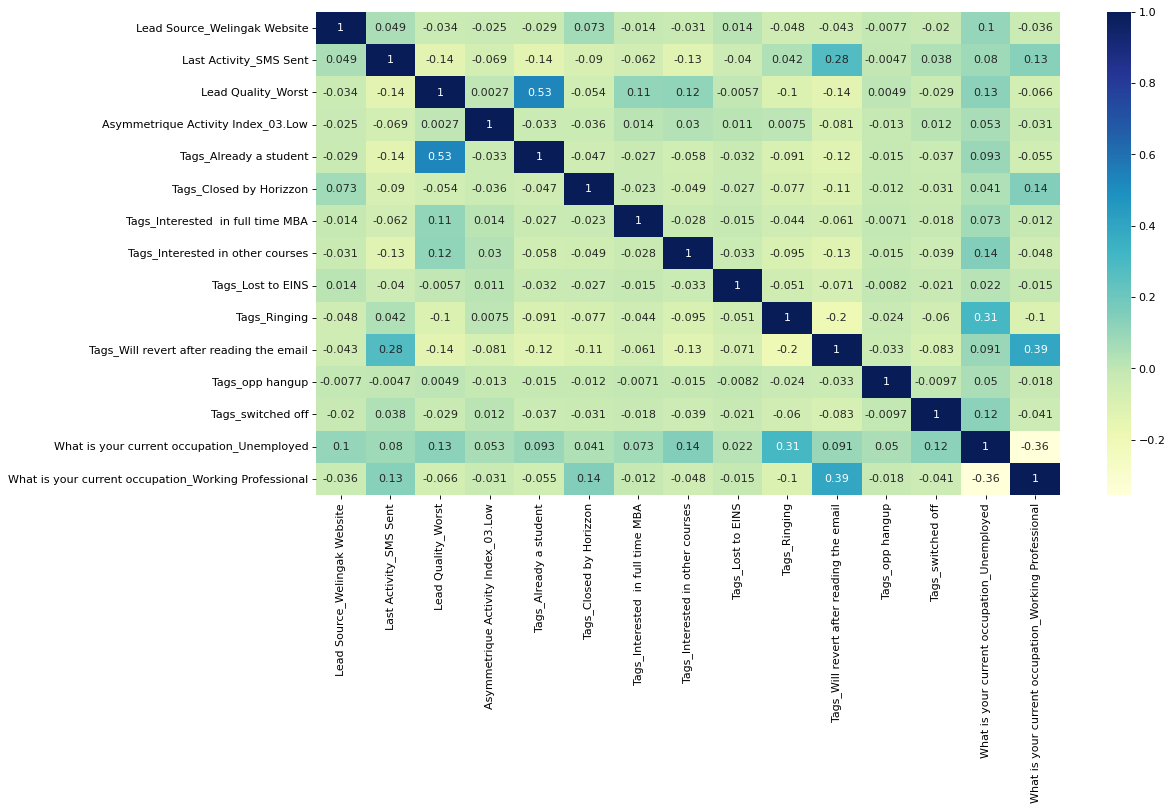

In [398]:
# Correlation
plt.figure(figsize=(15,8), dpi=80)

sns.heatmap(X_train[col].corr(), annot=True, cmap="YlGnBu")

plt.show()

Our latest model have the following features:
All variables have p-value < 0.05.
All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.
The overall accuracy of '0.914' at a probability threshold of 0.05 is also very acceptable.

So we need not drop any more variables and we can proceed with making predictions using this model only.

## Calculating other metrics 

In [399]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [400]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8217088055797733

In [401]:
# Let us calculate specificity
TN / float(TN+FP)

0.9715122470713525

In [402]:
# Calculate false postive rate - predicting churn when customer does not convert
print(FP/ float(TN+FP))

0.028487752928647497


In [403]:
# positive predictive value 
print (TP / float(TP+FP))

0.946285140562249


In [404]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8992114342040414


## Plotting the ROC Curve

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [405]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [406]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

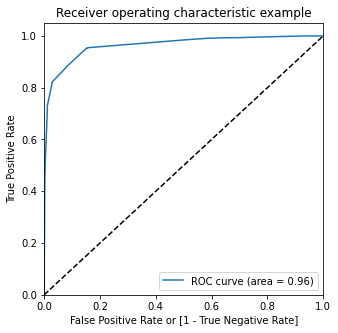

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.66240682e-04, 5.32481363e-04,
        5.32481363e-04, 1.59744409e-03, 1.59744409e-03, 1.59744409e-03,
        1.59744409e-03, 1.86368477e-03, 2.12992545e-03, 2.39616613e-03,
        2.39616613e-03, 3.99361022e-03, 3.99361022e-03, 1.06496273e-02,
        1.06496273e-02, 1.06496273e-02, 1.06496273e-02, 1.06496273e-02,
        1.11821086e-02, 1.11821086e-02, 1.11821086e-02, 1.11821086e-02,
        1.11821086e-02, 2.82215122e-02, 2.82215122e-02, 2.84877529e-02,
        2.84877529e-02, 2.84877529e-02, 2.95527157e-02, 2.95527157e-02,
        8.41320554e-02, 1.49627263e-01, 1.49893504e-01, 1.50958466e-01,
        1.50958466e-01, 1.53088392e-01, 1.53088392e-01, 1.53887114e-01,
        1.57614483e-01, 1.60276890e-01, 1.61341853e-01, 1.61874334e-01,
        5.07720980e-01, 5.72949947e-01, 5.73482428e-01, 5.748136

In [407]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [408]:
# calculating GINI
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [409]:
auc = auc_val(fpr,tpr)
auc

0.9637647476911106

## Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balance sensitivity and specificity.

In [410]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.991431,5720,1,1,1,1,1,1,1,1,1,1,1
1,0,0.069936,7026,0,1,0,0,0,0,0,0,0,0,0
2,1,0.960411,6968,1,1,1,1,1,1,1,1,1,1,1
3,1,0.366825,5016,0,1,1,1,1,0,0,0,0,0,0
4,1,0.783272,6653,1,1,1,1,1,1,1,1,1,0,0


In [411]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379174  1.000000  0.000000
0.1   0.1  0.882810  0.955100  0.838658
0.2   0.2  0.887107  0.952921  0.846912
0.3   0.3  0.888430  0.950741  0.850373
0.4   0.4  0.914711  0.821709  0.971512
0.5   0.5  0.914711  0.821709  0.971512
0.6   0.6  0.914380  0.820837  0.971512
0.7   0.7  0.913719  0.818657  0.971778
0.8   0.8  0.884959  0.714908  0.988818
0.9   0.9  0.884132  0.712729  0.988818


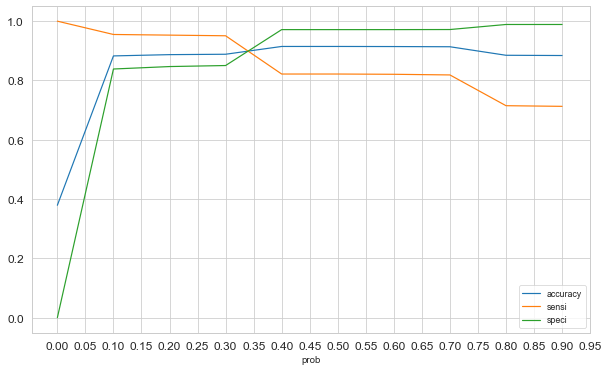

In [412]:
# Slightly alter the figure size to make it more horizontal.

#plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

From the curve above, 0.33 is the optimum point to take it as a cutoff probability.

In [413]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.991431,5720,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.069936,7026,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.960411,6968,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.366825,5016,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.783272,6653,1,1,1,1,1,1,1,1,1,0,0,1


In [414]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9041322314049587

In [415]:
# Confusion matrix
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1

array([[3440,  316],
       [ 264, 2030]], dtype=int64)

In [416]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [417]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8849171752397559

In [418]:
# Let's see the specificity of our logistic regression model
TN / float(TN+FP)

0.9158679446219382

In [419]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/ float(TN+FP)

0.08413205537806177

In [420]:
# Positive predictive value 
TP / float(TP+FP)

0.8653026427962489

In [421]:
# Negative predictive value
TN / float(TN+ FN)

0.9287257019438445

## Precision and Recall

In [422]:
# Precision
precision = confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])
precision

0.8653026427962489

In [423]:
# Recall
recall = confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])
recall

0.8849171752397559

Using sklearn utilities find the same

In [425]:
from sklearn.metrics import precision_score, recall_score

In [426]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8653026427962489

In [427]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8849171752397559

## Precision and Recall Tradeoff

In [428]:
from sklearn.metrics import precision_recall_curve

In [429]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       1
 1       0
 2       1
 3       1
 4       1
        ..
 6045    1
 6046    0
 6047    0
 6048    0
 6049    0
 Name: Converted, Length: 6050, dtype: int64,
 0       1
 1       0
 2       1
 3       1
 4       1
        ..
 6045    1
 6046    0
 6047    0
 6048    0
 6049    0
 Name: final_predicted, Length: 6050, dtype: int64)

In [430]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

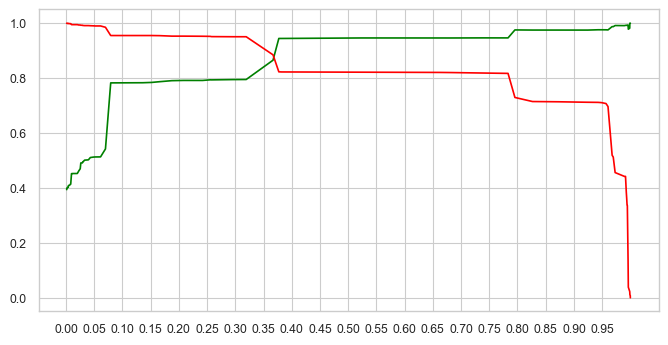

In [431]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

From the precision-recall graph above, we get the optical threshold value as close to .37. However our business requirement here is to have Lead Conversion Rate around 80%.

This is achieved with our earlier threshold value of 0.32. So we will stick to this value.

In [432]:
## Calculating the F1 score
F1 = 2*(precision*recall)/(precision+recall)
F1

0.875

## Making predictions on the test set


Using the scaler function from the train dataset to transfor the test dataset

In [433]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
378,0,-0.336465,-0.188969,-0.052301,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321,1,0.497461,1.702311,1.161899,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7646,0,0.497461,-0.220063,-0.459058,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
6317,0,-1.170391,-0.876707,-1.266501,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1241,0,-1.170391,-0.876707,-1.266501,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [434]:
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,Lead Quality_Worst,Asymmetrique Activity Index_03.Low,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off,What is your current occupation_Unemployed,What is your current occupation_Working Professional
378,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
321,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
7646,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6317,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [435]:
X_test_sm = sm.add_constant(X_test)

In [436]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

378     0.006594
321     0.025231
7646    0.061232
6317    0.069936
1241    0.069936
1235    0.069936
123     0.069936
6449    0.994678
6269    0.969703
8463    0.069936
dtype: float64

In [437]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
378,0.006594
321,0.025231
7646,0.061232
6317,0.069936
1241,0.069936


In [438]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [439]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [440]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [441]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [442]:
y_pred_final.head()

,Converted,LeadID,0
0,0,378,0.006594
1,0,321,0.025231
2,0,7646,0.061232
3,0,6317,0.069936
4,0,1241,0.069936


In [443]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [229]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,LeadID,Conversion_Prob
0,0,378,0.006888
1,0,321,0.025351
2,0,7646,0.061042
3,0,6317,0.070473
4,0,1241,0.070473


In [230]:
y_pred_final.shape

(2593, 3)

In [444]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.32 else 0)

In [445]:
y_pred_final.head()

,Converted,LeadID,Conversion_Prob,final_predicted
0,0,378,0.006594,0
1,0,321,0.025231,0
2,0,7646,0.061232,0
3,0,6317,0.069936,0
4,0,1241,0.069936,0


In [446]:

# Let's check the overall accuracy.
acc_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.9008870034708831

In [447]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[1436  148]
 [ 109  900]]


In [448]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [449]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8919722497522299

In [450]:
# Let us calculate specificity
TN / float(TN+FP)

0.9065656565656566

In [451]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.09343434343434344


In [452]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8587786259541985


In [453]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9294498381877022


In [454]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.8587786259541985

In [455]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.8919722497522299

In [456]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.8750607681088965

In [457]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1584
           1       0.86      0.89      0.88      1009

    accuracy                           0.90      2593
   macro avg       0.89      0.90      0.90      2593
weighted avg       0.90      0.90      0.90      2593



To avoid overfitting, let us calculate the Cross Validation Score to see how our model performs

In [458]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.86458333 0.89236111 0.90509259 0.91319444 0.91560694 0.92592593
 0.92708333 0.93179191 0.93179191 0.93634259]
0.9143774084778421


# Plotting the ROC Curve for Test Dataset

In [459]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [460]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

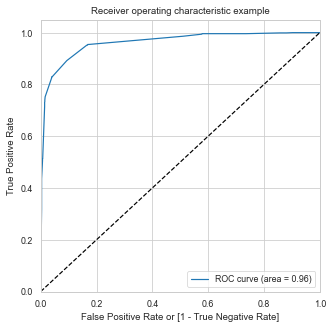

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.31313131e-04, 3.15656566e-03, 3.15656566e-03,
        3.15656566e-03, 3.15656566e-03, 3.15656566e-03, 3.15656566e-03,
        3.15656566e-03, 3.15656566e-03, 3.15656566e-03, 6.31313131e-03,
        6.31313131e-03, 6.94444444e-03, 1.38888889e-02, 1.38888889e-02,
        1.38888889e-02, 1.45202020e-02, 1.45202020e-02, 1.45202020e-02,
        1.45202020e-02, 1.57828283e-02, 3.91414141e-02, 3.91414141e-02,
        3.91414141e-02, 3.97727273e-02, 4.10353535e-02, 9.34343434e-02,
        1.64772727e-01, 1.66035354e-01, 1.66666667e-01, 1.67297980e-01,
        1.68560606e-01, 1.71085859e-01, 1.72348485e-01, 5.10101010e-01,
        5.77020202e-01, 5.78282828e-01, 5.80808081e-01, 5.99747475e-01,
        6.04166667e-01, 6.26262626e-01, 6.36363636e-01, 6.369949

In [461]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

# Calculating the Area Under the Curve(GINI)

In [462]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [463]:
auc = auc_val(fpr,tpr)
auc

0.9621487421289203

As a rule of thumb, an AUC can be classed as follows,

0.90 - 1.00 = excellent
0.80 - 0.90 = good
0.70 - 0.80 = fair
0.60 - 0.70 = poor
0.50 - 0.60 = fail

Since we got a value of 0.9630, our model seems to be doing well on the test dataset.

## Calculating Lead Score for the entire dataset

Lead score = 100 * ConversionProbability

In [465]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_df_test_pred = y_pred_final.copy()
leads_df_test_pred.head()

,Converted,LeadID,Conversion_Prob,final_predicted
0,0,378,0.006594,0
1,0,321,0.025231,0
2,0,7646,0.061232,0
3,0,6317,0.069936,0
4,0,1241,0.069936,0


In [466]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_df_train_pred = y_train_pred_final.copy()
leads_df_train_pred.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.991431,5720,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.069936,7026,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.960411,6968,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.366825,5016,0,1,1,1,1,0,0,0,0,0,0,1
4,1,0.783272,6653,1,1,1,1,1,1,1,1,1,0,0,1


In [467]:
# Dropping unnecessary columns from train dataset
leads_df_train_pred = leads_df_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
leads_df_train_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,5720,1,0.991431,1
1,7026,0,0.069936,0
2,6968,1,0.960411,1
3,5016,1,0.366825,1
4,6653,1,0.783272,1


## Concatenating the train and the test dataset with the Conversion Probabilities


In [468]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
leads_df_full_pred = leads_df_train_pred.append(leads_df_test_pred)
leads_df_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,5720,1,0.991431,1
1,7026,0,0.069936,0
2,6968,1,0.960411,1
3,5016,1,0.366825,1
4,6653,1,0.783272,1


In [469]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_df_train_pred.shape)
print(leads_df_test_pred.shape)
print(leads_df_full_pred.shape)

(6050, 4)
(2593, 4)
(8643, 4)


In [470]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(leads_df_full_pred['LeadID'].unique().tolist())

8643

In [471]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
leads_df_full_pred['Lead_Score'] = leads_df_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
leads_df_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted,Lead_Score
0,5720,1,0.991431,1,99
1,7026,0,0.069936,0,7
2,6968,1,0.960411,1,96
3,5016,1,0.366825,1,37
4,6653,1,0.783272,1,78


In [473]:
# Inspecing the max LeadID
leads_df_full_pred.LeadID.max()

9239

In [474]:
# Making the LeadID column as index
# We willlater join it with the original_leads dataframe based on index
leads_df_full_pred = leads_df_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
leads_df_full_pred.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
LeadID,,,,
0,0,0.025231,0,3
1,0,0.008395,0,1
2,1,0.795454,1,80
3,0,0.008395,0,1
4,1,0.960411,1,96


In [475]:
# Slicing the Lead Number column from original_leads dataframe
orig_leads_df = orig_leads_df[['Lead Number']]
orig_leads_df.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


Concatenating the 2 dataframes based on index.

This is done so that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.

In [476]:
# Concatenating the 2 dataframes based on index and displaying the top 10 rows
leads_df_with_score = pd.concat([orig_leads_df, leads_df_full_pred], axis=1)
leads_df_with_score.head(10)

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead_Score
0,660737,0,0.025231,0,3
1,660728,0,0.008395,0,1
2,660727,1,0.795454,1,80
3,660719,0,0.008395,0,1
4,660681,1,0.960411,1,96
5,660680,0,0.069936,0,7
6,660673,1,0.960411,1,96
7,660664,0,0.069936,0,7
8,660624,0,0.069936,0,7
9,660616,0,0.069936,0,7


In [478]:
# Inspecting the dataframe shape
leads_df_with_score.shape

(8643, 5)

# Determining Feature Importance

In [479]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Lead Source_Welingak Website                            4.34
Last Activity_SMS Sent                                  2.04
Lead Quality_Worst                                     -3.01
Asymmetrique Activity Index_03.Low                     -2.43
Tags_Already a student                                 -3.13
Tags_Closed by Horizzon                                 5.51
Tags_Interested  in full time MBA                      -2.75
Tags_Interested in other courses                       -2.90
Tags_Lost to EINS                                       5.69
Tags_Ringing                                           -4.01
Tags_Will revert after reading the email                3.95
Tags_opp hangup                                        -2.34
Tags_switched off                                      -4.75
What is your current occupation_Unemployed              1.83
What is your current occupation_Working Professional    2.11
dtype: float64

Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

In [480]:
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Source_Welingak Website                            76.34
Last Activity_SMS Sent                                  35.90
Lead Quality_Worst                                     -52.84
Asymmetrique Activity Index_03.Low                     -42.67
Tags_Already a student                                 -55.07
Tags_Closed by Horizzon                                 96.83
Tags_Interested  in full time MBA                      -48.35
Tags_Interested in other courses                       -50.93
Tags_Lost to EINS                                      100.00
Tags_Ringing                                           -70.58
Tags_Will revert after reading the email                69.37
Tags_opp hangup                                        -41.16
Tags_switched off                                      -83.47
What is your current occupation_Unemployed              32.18
What is your current occupation_Working Professional    37.06
dtype: float64

In [481]:
# Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Lead Source_Welingak Website                            12
Last Activity_SMS Sent                                   9
Lead Quality_Worst                                       4
Asymmetrique Activity Index_03.Low                       2
Tags_Already a student                                   7
Tags_Closed by Horizzon                                  6
Tags_Interested  in full time MBA                        3
Tags_Interested in other courses                        11
Tags_Lost to EINS                                       13
Tags_Ringing                                             1
Tags_Will revert after reading the email                14
Tags_opp hangup                                         10
Tags_switched off                                        0
What is your current occupation_Unemployed               5
What is your current occupation_Working Professional     8
dtype: int64

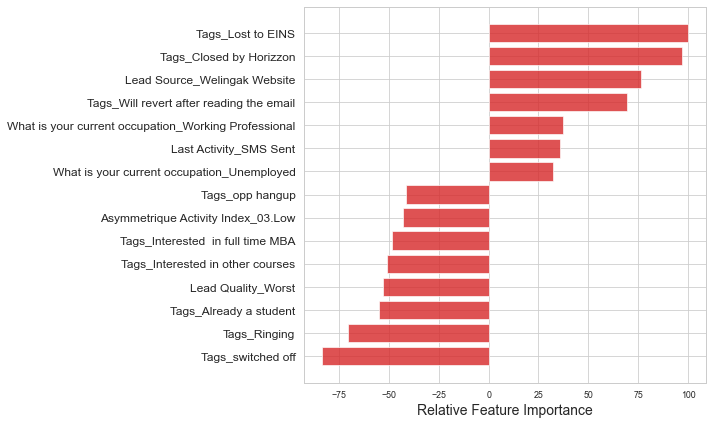

In [482]:
# Plot showing the feature variables based on their relative coefficient values
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

Selecting Top 3 features which contribute most towards the probability of a lead getting converted

In [483]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
8,Tags_Lost to EINS,100.00
5,Tags_Closed by Horizzon,96.83
0,Lead Source_Welingak Website,76.34


## Conclusion:

 - All variables have p-value < 0.05.
 - All the features have very low VIF values, meaning, there is `hardly any muliticollinearity` among the features. This is also evident from the heat map.
 - The overall accuracy of 0.88 at a probability threshold of 0.33 on the test dataset is also very acceptable.

The conversion probability of a lead increases with increase in values of the following features in descending order:
- Tags_Lost to EINS
- Tags_Closed by Horizzon
- Lead Source_Welingak Website
- Tags_Will revert after reading the email
- What is your current occupation_Working Professional
- Last Activity_SMS Sent
- What is your current occupation_Unemployed

The conversion probability of a lead increases with decrease in values of the following features in descending order:

- Tags_switched_off
- Tags_Ringing
- Tags_Already a student
- Lead Quality_Worst
- Tags_Interested in other courses
- Tags_Interested in full time MBA
- Asymmetrique Activity Index_0.3 Low
- Tags_opp hangup


